<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/End_User_Risk_Prediction/EndUser_model__selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the datasets
url1 = '/content/drive/MyDrive/DSGP_User/Pre Processed data/preprocessed_stock_report 1.xlsx'

data1 = pd.read_excel(url1)

In [ ]:
# Display the first few rows of each dataset
print("Dataset 1:")
print(data1.head())

Dataset 1:
  Transaction Date  Issued Qty  Customer name  Risk Level
0       2024-10-11       150.0             51           3
1       2024-10-11        30.0             52           1
2       2024-10-12       180.0             55           1
3       2024-10-15        60.0             64           1
4       2024-10-15       150.0             47           1


In [ ]:
# Prepare data (assuming 'Risk Level' is the target variable)
# For dataset
X = data1.drop('Risk Level', axis=1)  # Features
y = data1['Risk Level']  # Target

# Preprocess 'Transaction Date' - important for numerical models
if 'Transaction Date' in X.columns:
    X['Transaction Date'] = pd.to_datetime(X['Transaction Date'], errors='coerce')  # Handle potential parsing issues
    X['Transaction Date'] = X['Transaction Date'].astype(int) / 10**9  # Convert to seconds since epoch
else:
    print("Warning: 'Transaction Date' column not found in the data.")


# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use 'mean' or other appropriate strategy
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame to retain feature names
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.2, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.12      0.17         8
           1       0.99      0.99      0.99       210
           2       0.92      0.96      0.94        90
           3       0.80      0.80      0.80        10

    accuracy                           0.95       318
   macro avg       0.74      0.72      0.72       318
weighted avg       0.94      0.95      0.95       318

Accuracy: 0.95
Recall: 0.95
Precision: 0.94
F1 Score: 0.95
ROC AUC: 1.00


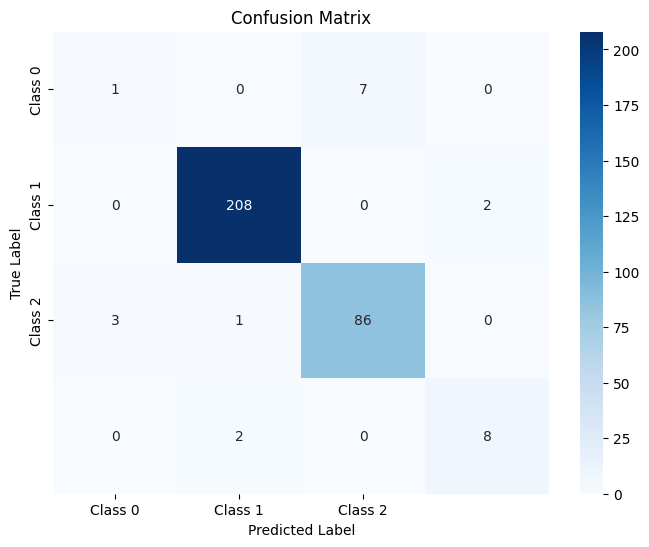

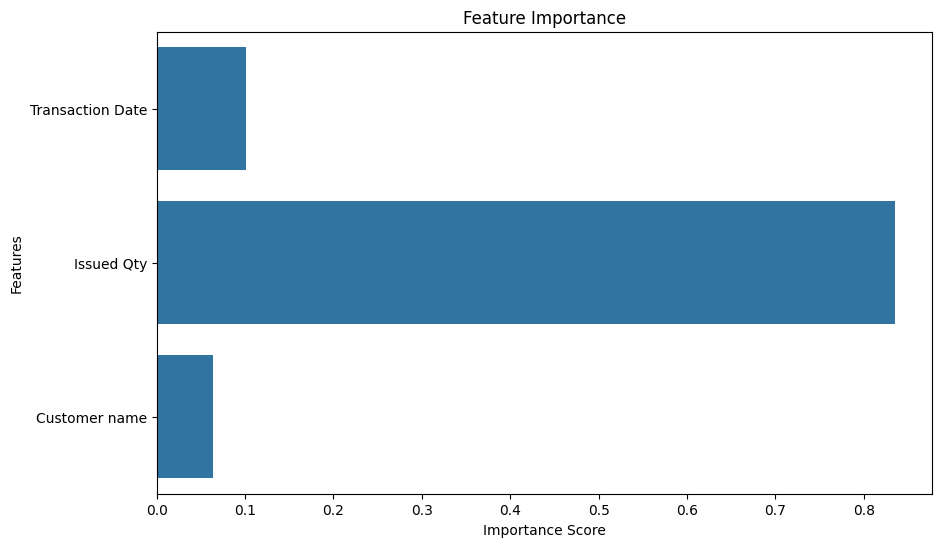

Training Accuracy: 1.0000
Testing Accuracy: 0.9528


In [ ]:
# Random Forest

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr', average='weighted') # Added multi_class='ovr'

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
features = X_imputed_df.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

train_accuracy = rf_model.score(X_train, y_train)  # Accuracy on training data
print(f"Training Accuracy: {train_accuracy:.4f}")

test_accuracy = rf_model.score(X_test, y_test)  # Accuracy on test data
print(f"Testing Accuracy: {test_accuracy:.4f}")


Class distribution before SMOTE:
Risk Level
1    861
2    225
0     25
Name: count, dtype: int64

Class distribution after SMOTE:
Risk Level
2    861
1    861
0    861
Name: count, dtype: int64

Classification Report After Fixing Class Imbalance:
              precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.97      0.92      0.95       370
           2       0.69      0.91      0.78        96

    accuracy                           0.90       477
   macro avg       0.89      0.64      0.63       477
weighted avg       0.92      0.90      0.90       477



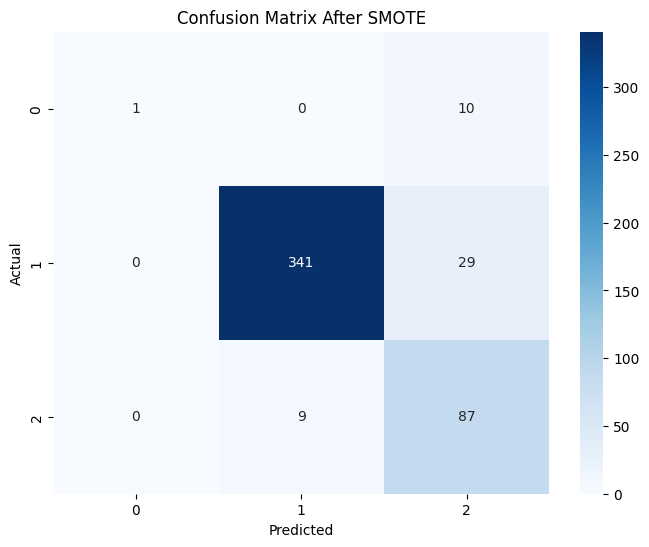

<ipython-input-18-abdc324e49c7>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette="viridis")


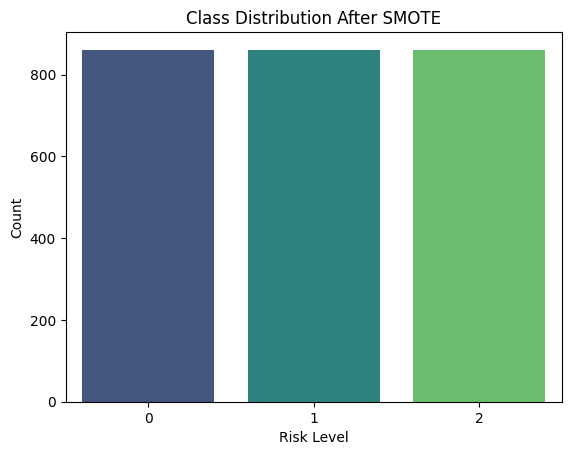

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ Load Dataset
file_path = "/content/drive/MyDrive/DSGP_User/Pre Processed data/preprocessed_stock_report 1.xlsx"
data = pd.read_excel(file_path)

# 2️⃣ Define Target Variable
target_col = "Risk Level"

# 3️⃣ Define Features (X) and Target (y)
X = data.drop(columns=[target_col])  # Features
y = data[target_col]  # Target

# 4️⃣ Convert 'Transaction Date' to numeric format
if 'Transaction Date' in X.columns:
    X['Transaction Date'] = pd.to_datetime(X['Transaction Date'], errors='coerce')
    X['Transaction Date'] = X['Transaction Date'].astype(int) / 10**9  # Convert to seconds since epoch

# 5️⃣ Handle missing values
X = X.fillna(X.mean())  # Filling missing values with mean

# 6️⃣ Split Data Before Applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 7️⃣ Check Class Distribution Before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# 8️⃣ Apply SMOTE to Oversample Minority Classes (0 and 3)
smote = SMOTE(sampling_strategy="auto", random_state=42, k_neighbors=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 9️⃣ Check Class Distribution After SMOTE
print("\nClass distribution after SMOTE:")
print(y_train_smote.value_counts())

# 🔟 Scale Features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# 1️⃣1️⃣ Train Random Forest Model on Balanced Data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# 1️⃣2️⃣ Make Predictions
y_pred = rf_model.predict(X_test)

# 1️⃣3️⃣ Display Classification Report
print("\nClassification Report After Fixing Class Imbalance:")
print(classification_report(y_test, y_pred))

# 1️⃣4️⃣ Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix After SMOTE")
plt.show()

# 1️⃣5️⃣ Display Class Distribution After Fixing Imbalance
sns.countplot(x=y_train_smote, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()


In [ ]:
import joblib

model_save_path = '/content/drive/MyDrive/DSGP_User/Pre Processed data/random_forest_model.pkl'

# Save the model
joblib.dump(rf_model, model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to /content/drive/MyDrive/DSGP_User/Pre Processed data/random_forest_model.pkl


Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.31      0.31        13
           1       0.98      0.98      0.98       319
           2       0.93      0.92      0.93       131
           3       0.64      0.64      0.64        14

    accuracy                           0.94       477
   macro avg       0.72      0.71      0.72       477
weighted avg       0.94      0.94      0.94       477

Accuracy: 0.94
Recall: 0.94
Precision: 0.94
F1 Score: 0.94
ROC AUC: 1.00


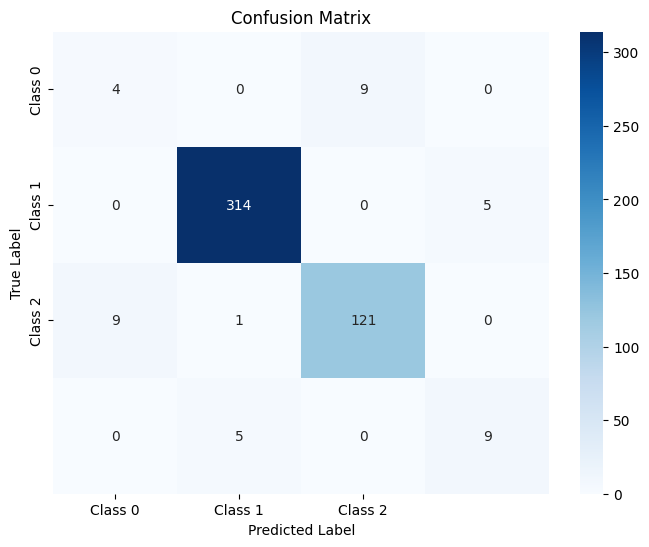

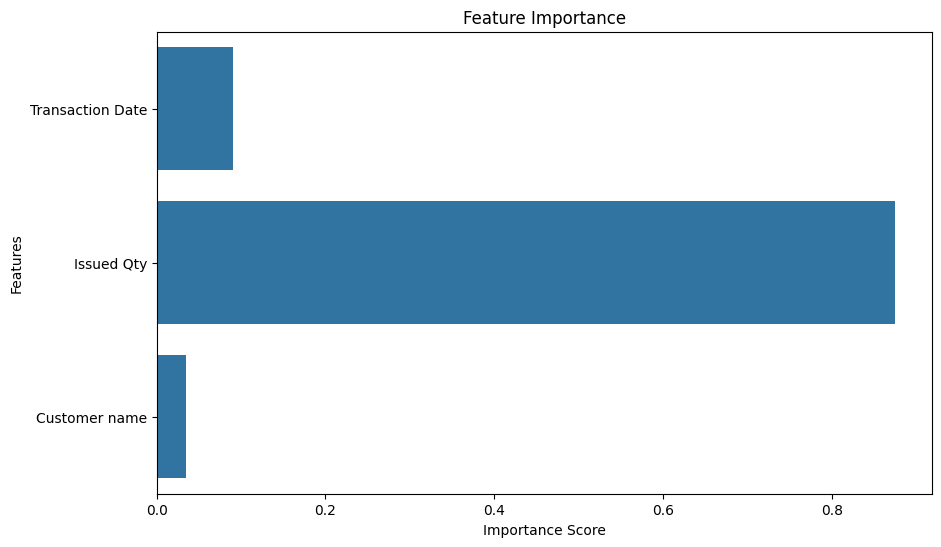

In [ ]:
# Gradient Boosting
# Use the imputed DataFrame instead of the original X_combined
X_combined_imputed_df = X_imputed_df
y_combined = y
X_train, X_test, y_train, y_test = train_test_split(X_combined_imputed_df, y_combined, test_size=0.3, random_state=42)

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr', average='weighted')

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance Visualization
feature_importances = gb_model.feature_importances_
features = X_imputed_df.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.93      1.00      0.97       319
           2       0.90      0.93      0.92       131
           3       0.00      0.00      0.00        14

    accuracy                           0.92       477
   macro avg       0.46      0.48      0.47       477
weighted avg       0.87      0.92      0.90       477

Accuracy: 0.92
Recall: 0.92
Precision: 0.87
F1 Score: 0.90
ROC AUC: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

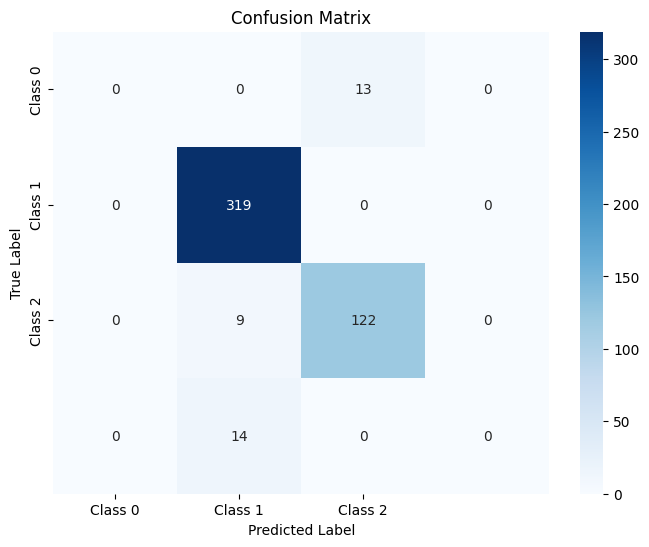

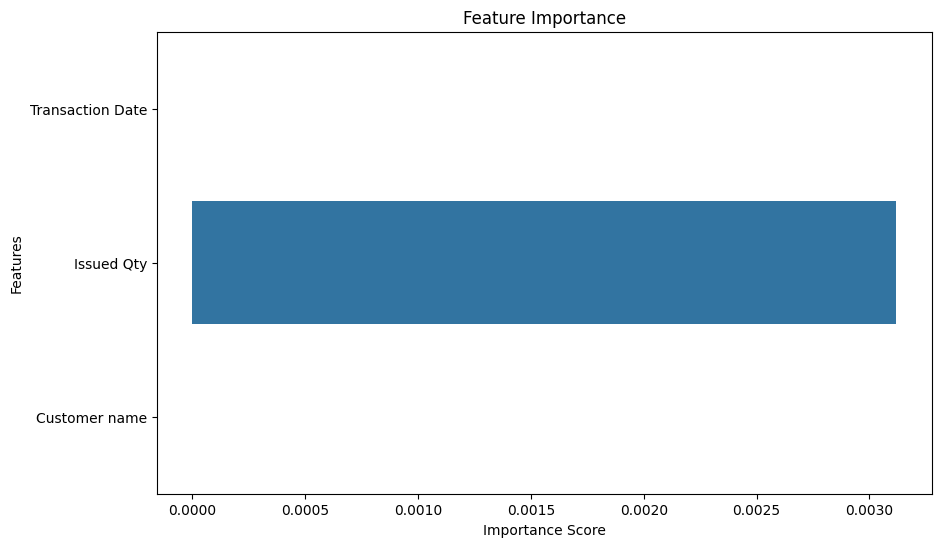

In [ ]:
# Logistic Regression
# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr', average='weighted')


# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance Visualization (Logistic Regression coefficients)
feature_importances = log_reg_model.coef_[0]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X_imputed_df.columns)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()